# Exploritary Data Analysis

AFKATM, Uton Hackathon 2019

<img src="image.png" width="420" height="200">

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load the ATM withdrawals data set and visualize the distribution of different categorical features

(The data is also cleaned where necessary)

In [2]:
df = pd.read_csv('data.csv')

df = df.drop(columns='Holiday Sequence')

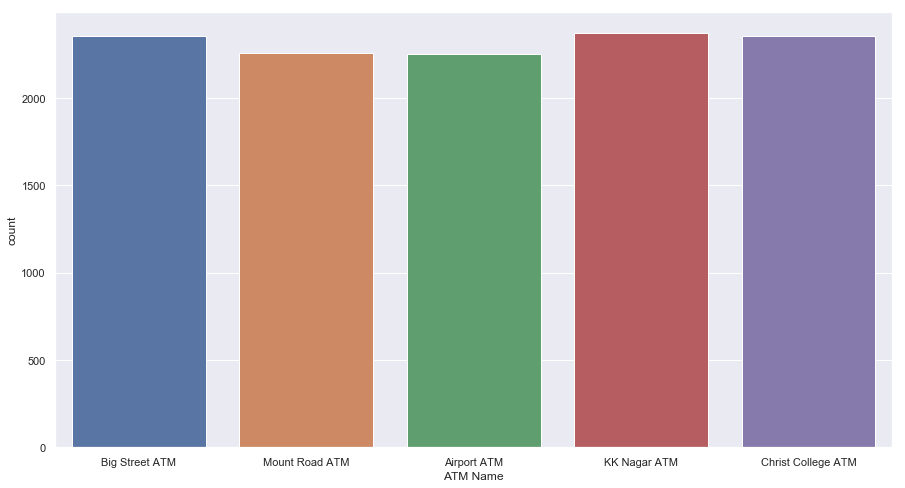

In [3]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ATM Name', data=df)

In [4]:
df['ATM Name'].value_counts()

KK Nagar ATM          2371
Christ College ATM    2355
Big Street ATM        2354
Mount Road ATM        2256
Airport ATM           2253
Name: ATM Name, dtype: int64

In [5]:
def process_date(date):
    if '/' in date:
        return dt.datetime(day=int(date.split('/')[1]), month=int(date.split('/')[0]), year=int(date.split('/')[-1]))
    if '-' in date:
        return dt.datetime(day=int(date.split('-')[0]), month=int(date.split('-')[1]), year=int(date.split('-')[-1]))
    return date

df['Transaction Date'] = df['Transaction Date'].apply(process_date)

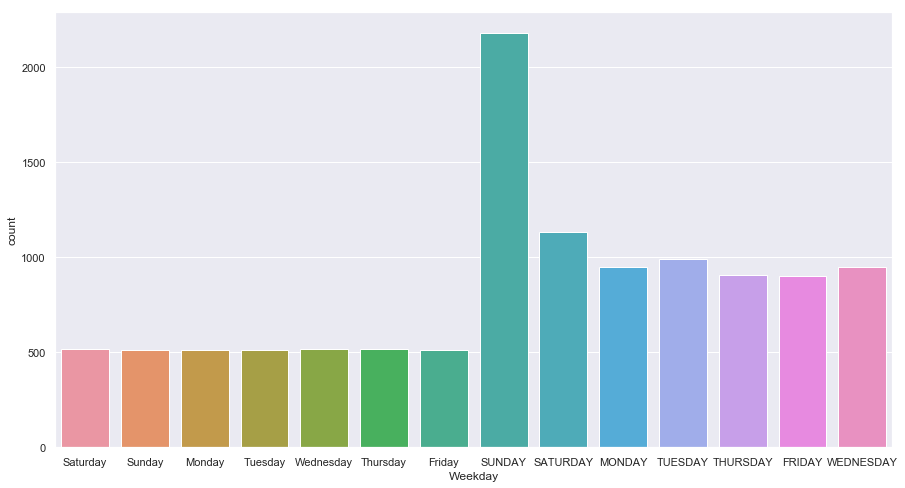

In [6]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Weekday', data=df)

In [7]:
df['Weekday'].value_counts()

SUNDAY       2177
SATURDAY     1131
TUESDAY       989
WEDNESDAY     947
MONDAY        945
THURSDAY      903
FRIDAY        902
Saturday      518
Thursday      517
Wednesday     515
Monday        513
Tuesday       513
Friday        510
Sunday        509
Name: Weekday, dtype: int64

In [8]:
df['Weekday'] = list(pd.to_datetime(df.index.get_level_values(0)).weekday + 1)

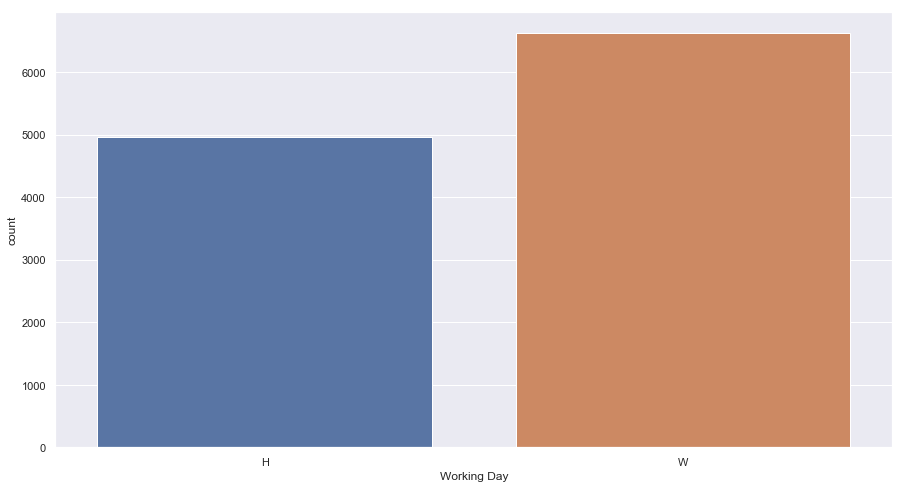

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Working Day', data=df)

In [10]:
df['Festival Religion'].value_counts()

NH    10727
H       367
N       198
M       178
C       119
Name: Festival Religion, dtype: int64

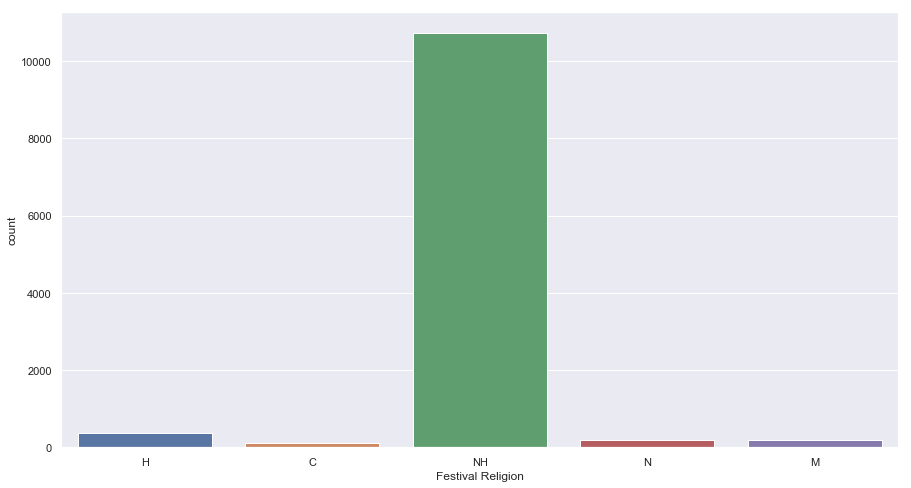

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Festival Religion', data=df)

In [12]:
df['Working Day'] = (df['Working Day'] == 'W').astype('int')

In [13]:
index = pd.DataFrame(index=pd.MultiIndex.from_product([
    pd.date_range(start=df['Transaction Date'].min(), end=df['Transaction Date'].max(), freq='1d'),
    set(df['ATM Name'])
], names=['Transaction Date', 'ATM Name']))

df = df.set_index(['Transaction Date', 'ATM Name']).join(index, how='right')

In [14]:
df['Weekday'] = list(pd.to_datetime(df.index.get_level_values(0)).weekday + 1)

In [15]:
for day in [6, 7]:
    df['Working Day'][(df.isna().any(axis=1))&(df['Weekday'] == day)] = 0

for day in [1, 2, 3, 4, 5]:
    df['Working Day'][(df.isna().any(axis=1))&(df['Weekday'] == day)] = 1

## Fill missing values

In [16]:
df['Festival Religion'][df.isna().any(axis=1)] = 'NH'

In [17]:
for atm in set(df.index.get_level_values(1)):
    df[df.index.get_level_values(1) == atm] = df[df.index.get_level_values(1) == atm].fillna(df[df.index.get_level_values(1) == atm].mean().to_dict())

## Rename columns and save the clean dataset for further work

In [18]:
df = df.reset_index().rename(columns={
    'Transaction Date': 'date',
    'ATM Name': 'atm_name',
    'No Of Withdrawals': 'withdrawals_total',
    'No Of XYZ Card Withdrawals': 'withdrawals_xyz',
    'No Of Other Card Withdrawals': 'withdrawals_other',
    'Total amount Withdrawn': 'amount_total',
    'Amount withdrawn XYZ Card': 'amount_xyz',
    'Amount withdrawn Other Card': 'amount_other',
    'Weekday': 'weekday',
    'Festival Religion': 'festival',
    'Working Day': 'working_day'
})

df.to_csv('./data_clean.csv', index=False)

## Plot distribution of withdrawal amounts

Text(0.5,1,'Total amount of withdrawals')

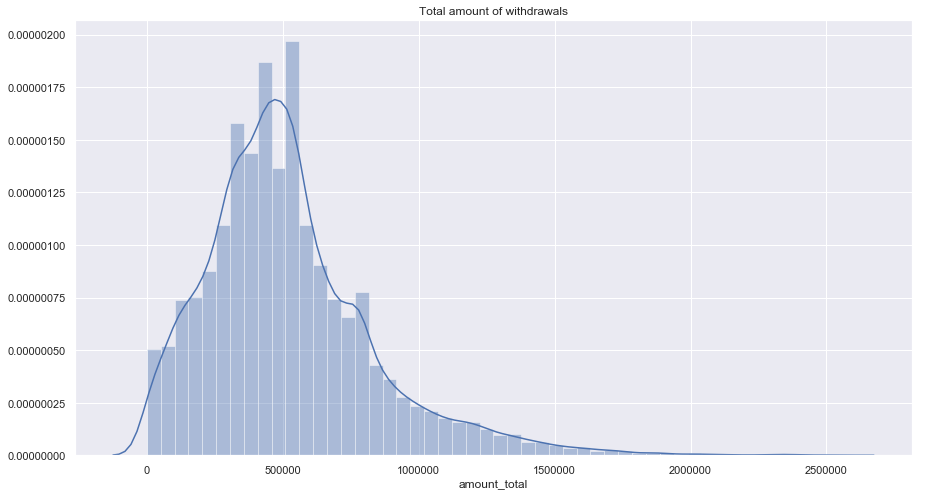

In [19]:
plt.figure(figsize=(15, 8))
sns.distplot(df.amount_total).set_title('Total amount of withdrawals')

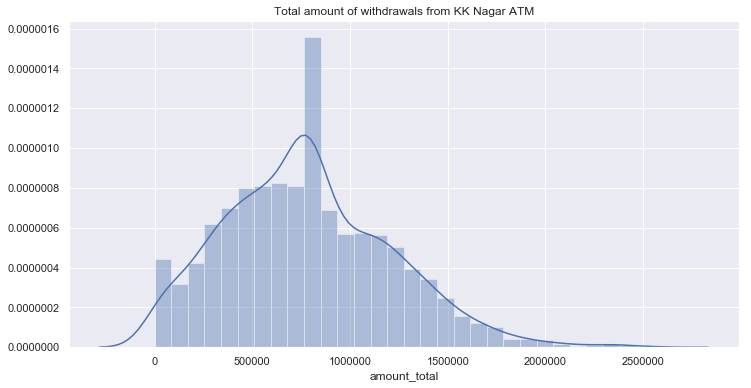

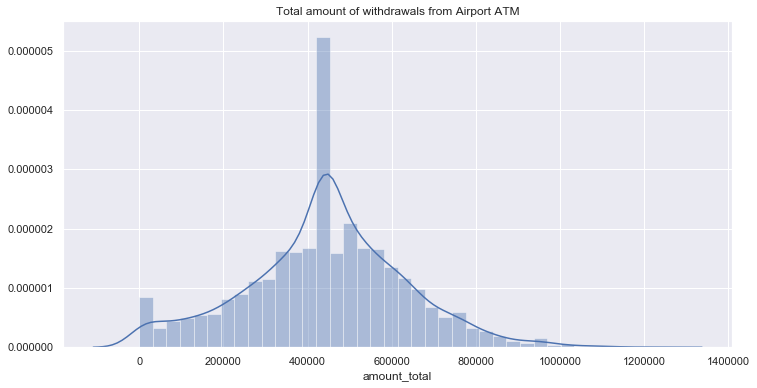

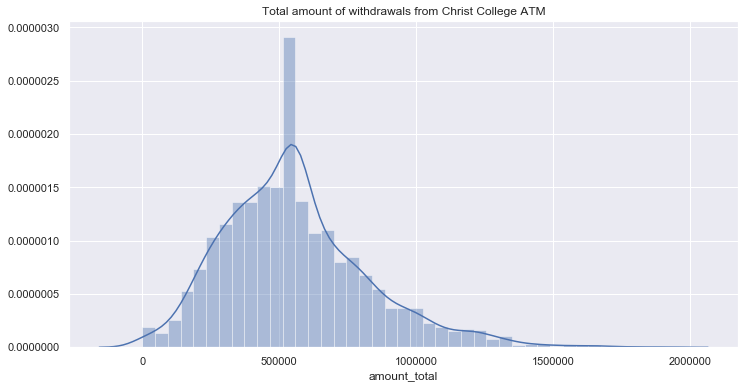

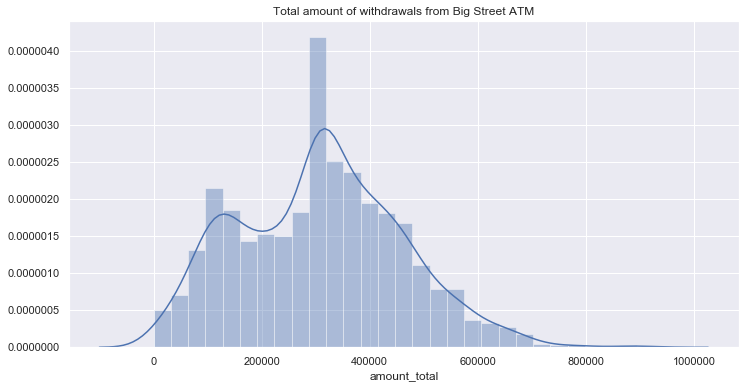

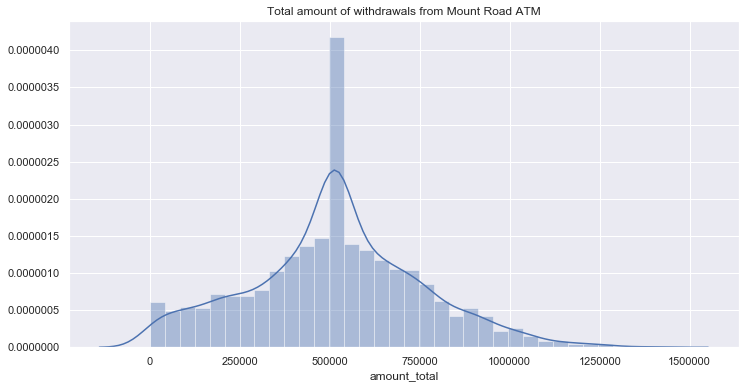

In [20]:
for name in set(df.atm_name):
    plt.figure(figsize=(12, 6))
    sns.distplot(df[df.atm_name == name].amount_total).set_title(f'Total amount of withdrawals from {name}')

## Visalize the withdrawal time series for each ATM

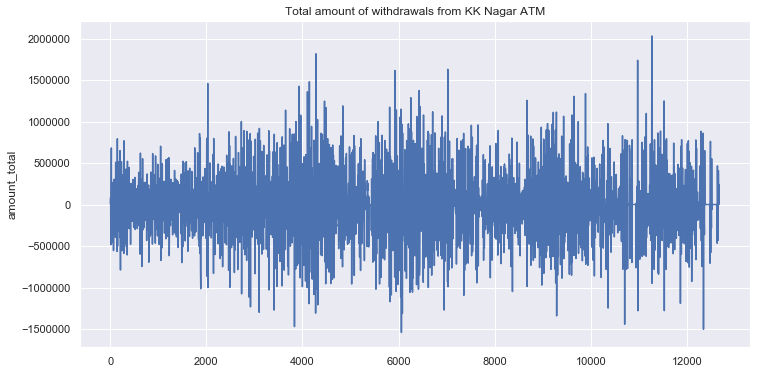

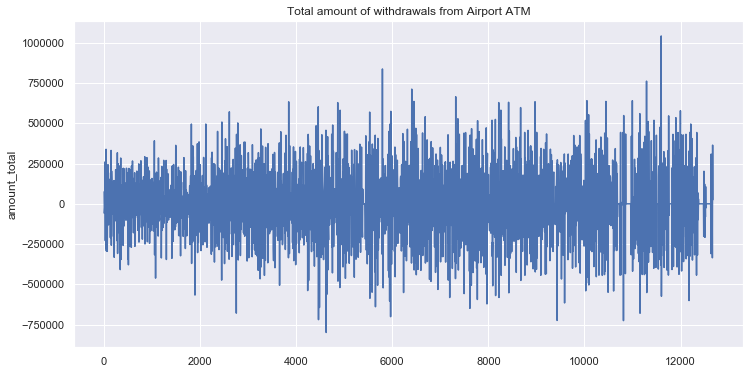

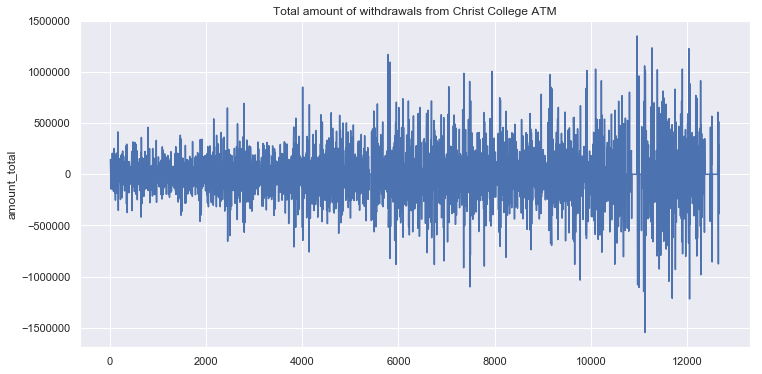

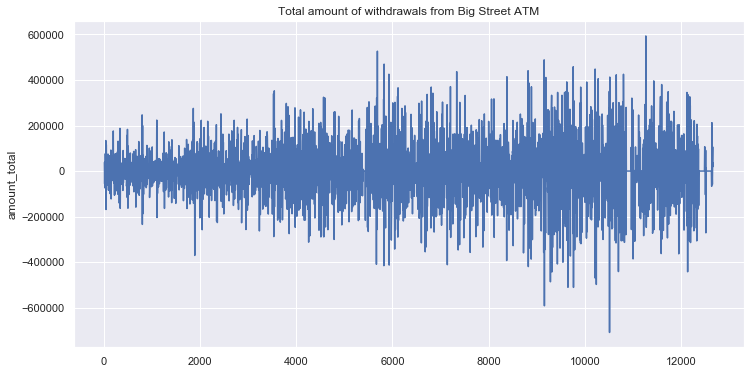

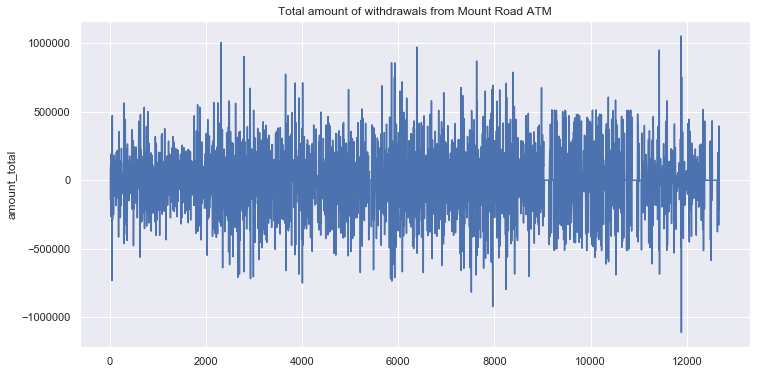

In [22]:
for name in set(df.atm_name):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df[df.atm_name == name].index, y=df[df.atm_name == name].amount_total.diff(1)).set_title(f'Total amount of withdrawals from {name}')